In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
df = pd.read_csv(
    'data/rawdata/combined_dataform2.csv')

In [91]:
df = df[(df['Personal'] == 'Stipan Aleksandar')]
df = df.drop(df[(df['Tag'] == 'Beginn Arbeit') | (df['Tag'] == 'Beginn Pause')].index)


In [92]:
df

,Personal,Tag,T.Summe,T.Pause,gesetzl. Pause,T.Summe (-Pause),Verdienst,Soll,+- Diff.
0,Stipan Aleksandar,02.01.2023,582,30,45,537,116.171,6.67,2.280000
5,Stipan Aleksandar,03.01.2023,479,30,30,449,97.13366666666667,6.67,0.813333
10,Stipan Aleksandar,04.01.2023,473,30,30,443,95.83566666666667,6.67,0.713333
15,Stipan Aleksandar,05.01.2023,464,31,31,433,93.67233333333334,6.67,0.546667
20,Stipan Aleksandar,09.01.2023,510,30,30,480,103.84,6.67,1.330000
...,...,...,...,...,...,...,...,...,...
793,Stipan Aleksandar,13.12.2022,522,35,35,487,105.3543333333333,6.67,1.446667
798,Stipan Aleksandar,14.12.2022,534,31,31,503,108.8156666666667,6.67,1.713333
803,Stipan Aleksandar,15.12.2022,560,30,45,515,111.4116666666667,6.67,1.913333
808,Stipan Aleksandar,16.12.2022,579,30,45,534,115.522,6.67,2.230000


In [93]:
df.rename(columns={'Personal': 'id', 'Tag': 'date','T.Summe': 'drive_time_min', 'T.Pause': 'pause_had_min', 'gesetzl. Pause': 'pause_should_min' }, inplace=True)

In [94]:
clean_columns = df.drop(['T.Summe (-Pause)', 'Verdienst', 'Soll', '+- Diff.'], axis=1)

In [95]:
clean_columns['drive_time_min'] = clean_columns['drive_time_min'].astype(int)
clean_columns['pause_had_min'] = clean_columns['pause_had_min'].astype(int)
clean_columns['pause_should_min'] = clean_columns['pause_should_min'].astype(int)

In [96]:
clean_columns

,id,date,drive_time_min,pause_had_min,pause_should_min
0,Stipan Aleksandar,02.01.2023,582,30,45
5,Stipan Aleksandar,03.01.2023,479,30,30
10,Stipan Aleksandar,04.01.2023,473,30,30
15,Stipan Aleksandar,05.01.2023,464,31,31
20,Stipan Aleksandar,09.01.2023,510,30,30
...,...,...,...,...,...
793,Stipan Aleksandar,13.12.2022,522,35,35
798,Stipan Aleksandar,14.12.2022,534,31,31
803,Stipan Aleksandar,15.12.2022,560,30,45
808,Stipan Aleksandar,16.12.2022,579,30,45


In [97]:
clean_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 813
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                162 non-null    object
 1   date              162 non-null    object
 2   drive_time_min    162 non-null    int32 
 3   pause_had_min     162 non-null    int32 
 4   pause_should_min  162 non-null    int32 
dtypes: int32(3), object(2)
memory usage: 5.7+ KB


In [98]:
clean_columns['date'] = clean_columns['date'].str.strip()
clean_columns['date'] = pd.to_datetime(clean_columns['date'], format='%d.%m.%Y', errors='coerce')
cleaned_data = clean_columns


In [99]:
cleaned_data

,id,date,drive_time_min,pause_had_min,pause_should_min
0,Stipan Aleksandar,2023-01-02,582,30,45
5,Stipan Aleksandar,2023-01-03,479,30,30
10,Stipan Aleksandar,2023-01-04,473,30,30
15,Stipan Aleksandar,2023-01-05,464,31,31
20,Stipan Aleksandar,2023-01-09,510,30,30
...,...,...,...,...,...
793,Stipan Aleksandar,2022-12-13,522,35,35
798,Stipan Aleksandar,2022-12-14,534,31,31
803,Stipan Aleksandar,2022-12-15,560,30,45
808,Stipan Aleksandar,2022-12-16,579,30,45


In [100]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 813
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                162 non-null    object        
 1   date              162 non-null    datetime64[ns]
 2   drive_time_min    162 non-null    int32         
 3   pause_had_min     162 non-null    int32         
 4   pause_should_min  162 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 5.7+ KB


In [101]:
cleaned_data.isnull().sum()

id                  0
date                0
drive_time_min      0
pause_had_min       0
pause_should_min    0
dtype: int64

In [102]:
cleaned_data.sort_values(by='date', inplace=True)
cleaned_data['drive_time_min'] = cleaned_data['drive_time_min'] - cleaned_data['pause_should_min']

In [103]:
cleaned_data.tail()

,id,date,drive_time_min,pause_had_min,pause_should_min
528,Stipan Aleksandar,2023-06-26,420,29,30
533,Stipan Aleksandar,2023-06-27,425,31,31
538,Stipan Aleksandar,2023-06-28,482,39,39
543,Stipan Aleksandar,2023-06-29,419,29,30
548,Stipan Aleksandar,2023-06-30,419,28,30


In [104]:
cleaned_data['total_time_hour'] = (cleaned_data['drive_time_min'] + cleaned_data['pause_should_min']) / 60

In [105]:
cleaned_data.describe()

,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
count,162,162.000000,162.000000,162.000000,162.000000
mean,2023-02-14 05:55:33.333333248,446.870370,30.833333,32.049383,7.981996
min,2022-10-04 00:00:00,392.000000,0.000000,30.000000,7.050000
25%,2022-12-02 18:00:00,423.000000,30.000000,30.000000,7.566667
50%,2023-02-15 00:00:00,437.000000,30.000000,30.000000,7.800000
75%,2023-04-24 18:00:00,464.750000,31.000000,32.000000,8.245833
max,2023-06-30 00:00:00,554.000000,67.000000,67.000000,9.983333
std,NaN,31.211588,4.289595,4.591110,0.554942


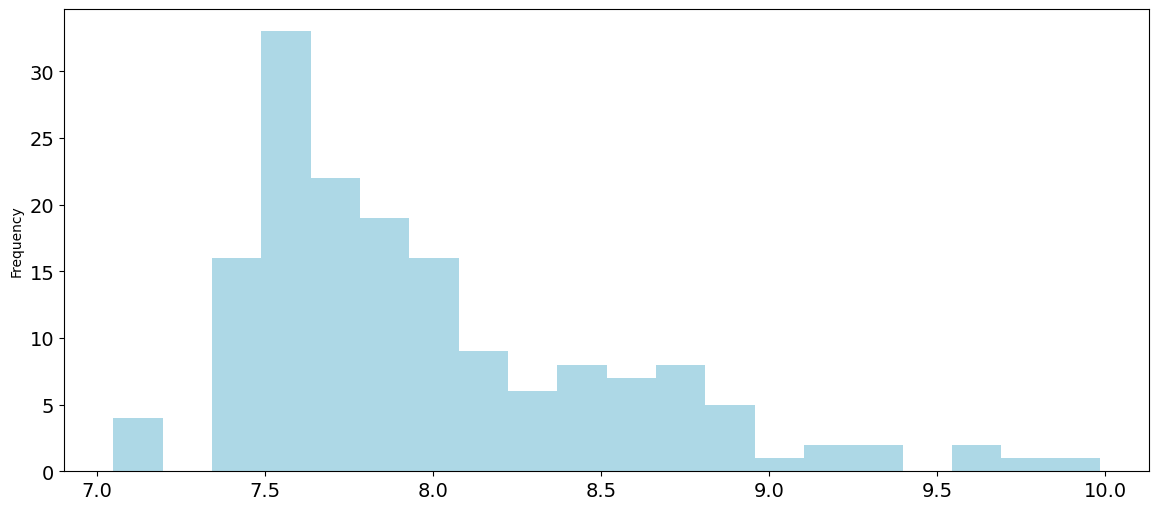

In [106]:
x = cleaned_data['total_time_hour'].plot(kind='hist', figsize=(14, 6), bins=20, fontsize=14, color='lightblue')

<Axes: xlabel='date'>

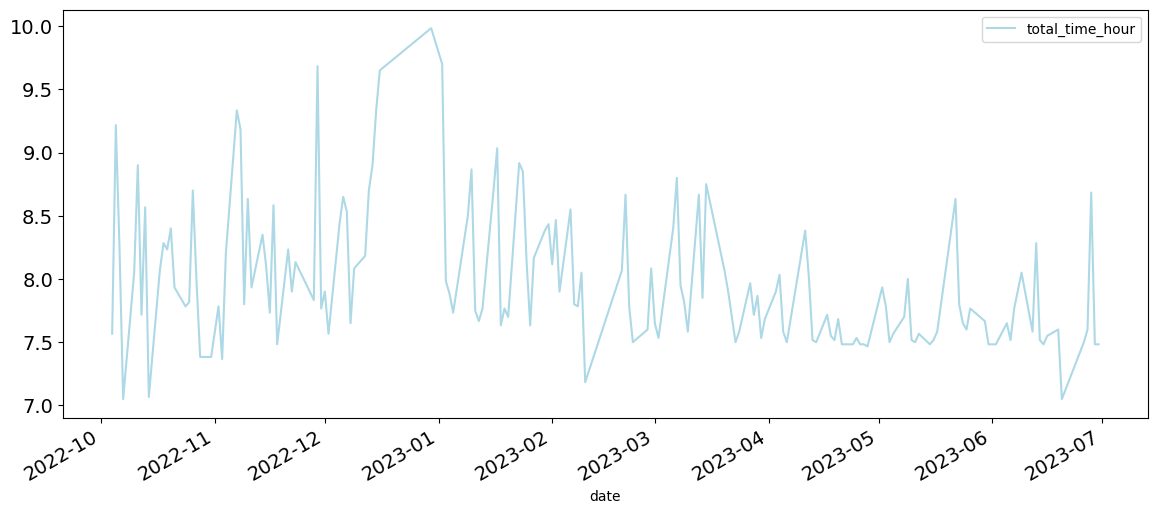

In [107]:
cleaned_data.plot(x='date', y='total_time_hour', figsize=(14, 6), fontsize=14, color='lightblue')

In [108]:
cleaned_data.to_csv('cleaned_data2.csv', index=False)